# Data Preparation

## 1. Discovering Missing Values

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [261]:
data = pd.read_csv("spaceship_titanic.csv")

In [262]:
data.shape

(8693, 14)

In [263]:
data['HomePlanet'].value_counts()

HomePlanet
Earth     4487
Europa    2089
Mars      1716
Name: count, dtype: int64

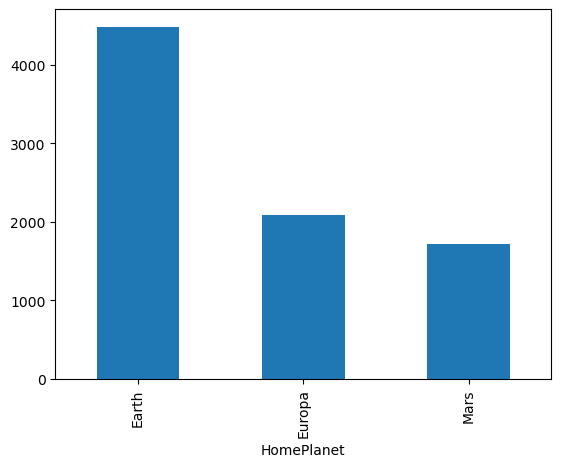

In [264]:
data['HomePlanet'].value_counts().plot.bar()
plt.show()

In [265]:
# Transported is the target column?--> thats why we check if its balanced
transported_counts = data['Transported'].value_counts() # is it balanced?
print(transported_counts/len(data)*100)

# the results are ok
# its not balanced if theres a 80/20 ratio difference
# transported doesnt have missing values

Transported
True     4378
False    4315
Name: count, dtype: int64

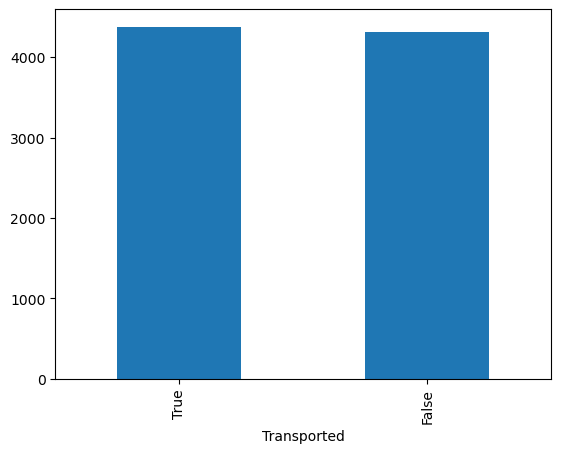

In [266]:
data['Transported'].value_counts().plot.bar()
plt.show()

In [267]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8292 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         1892 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           7699 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [269]:
data.isnull().sum()

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

In [270]:
data.isnull().sum().sum()

9941

In [271]:
missing_percent = data.isnull().sum() / len(data) * 100

In [272]:
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})

In [273]:
missing_percent

,column,percent missing
0,PassengerId,0.000000
1,HomePlanet,4.612907
2,CryoSleep,2.496261
3,Cabin,78.235362
4,Destination,2.093639
5,Age,11.434488
6,VIP,2.335212
7,RoomService,2.082135
8,FoodCourt,2.105142
9,ShoppingMall,2.392730


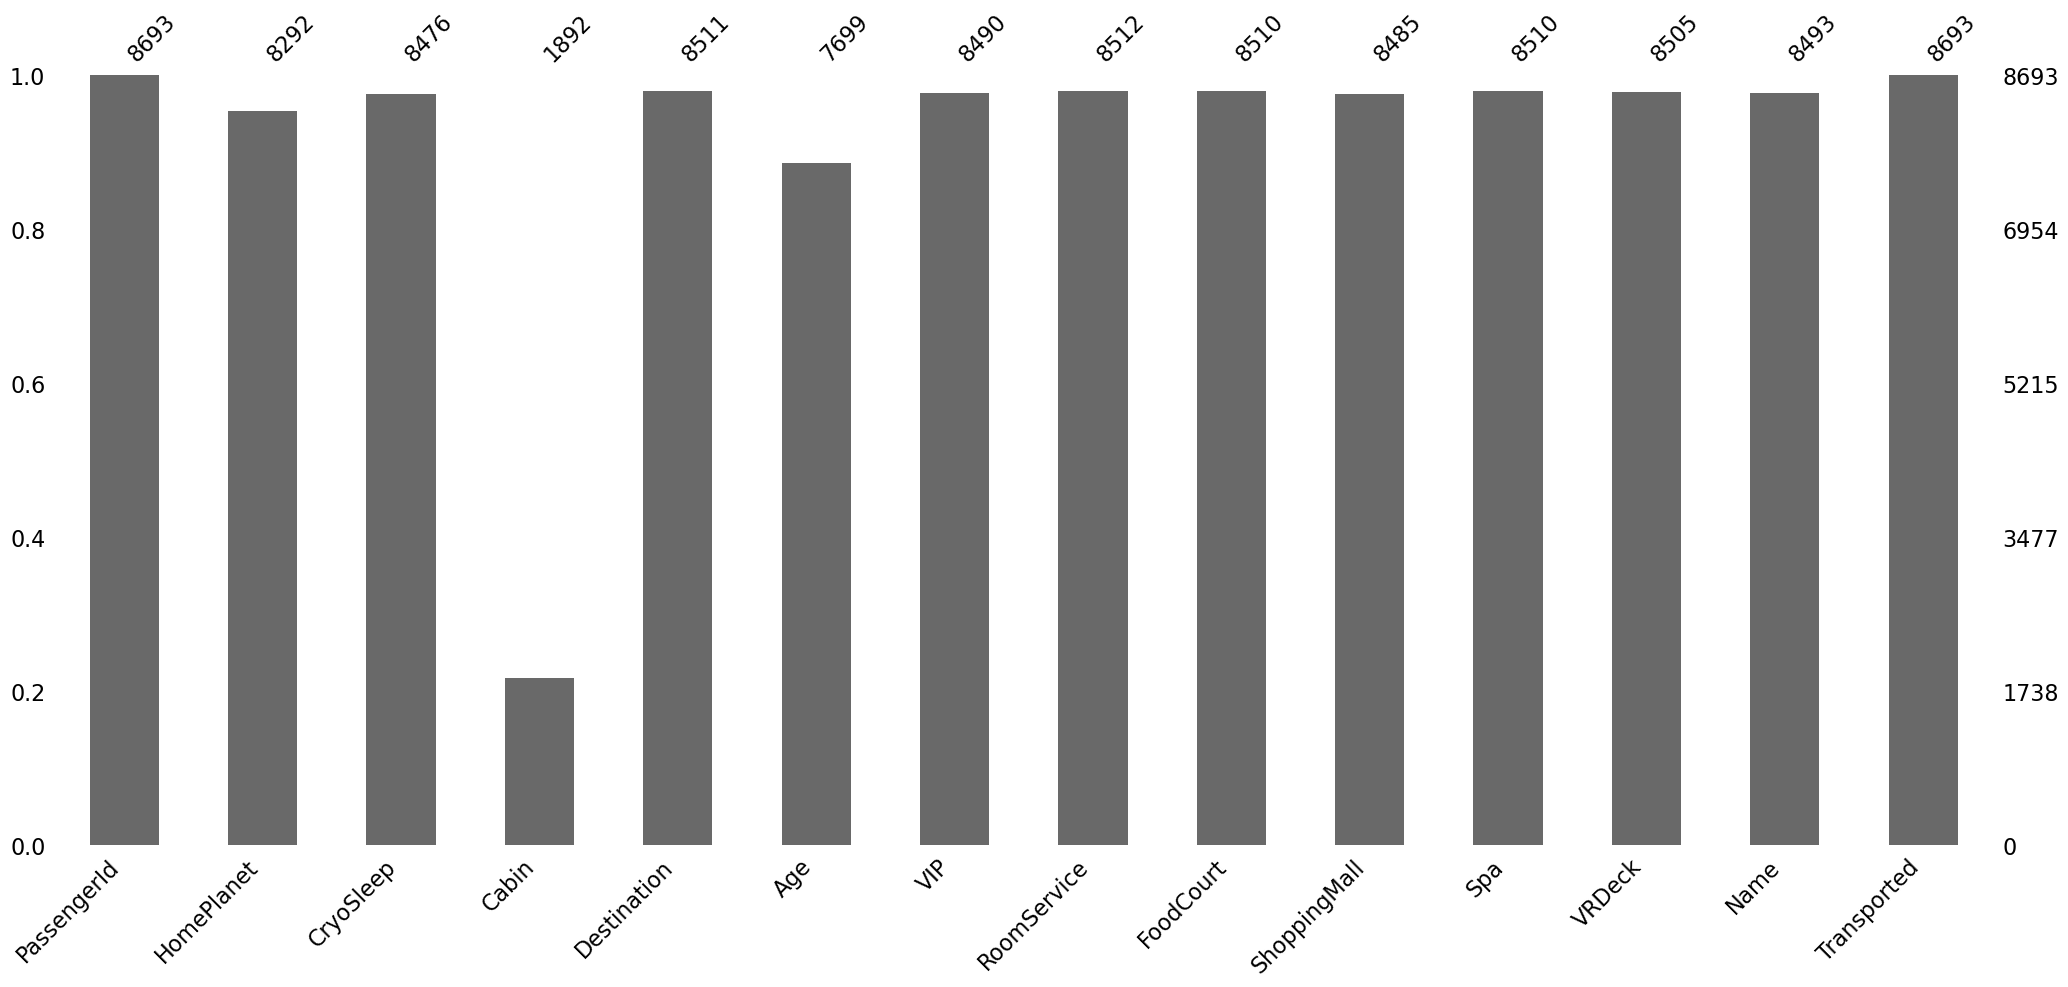

In [274]:
msno.bar(data)
plt.show()

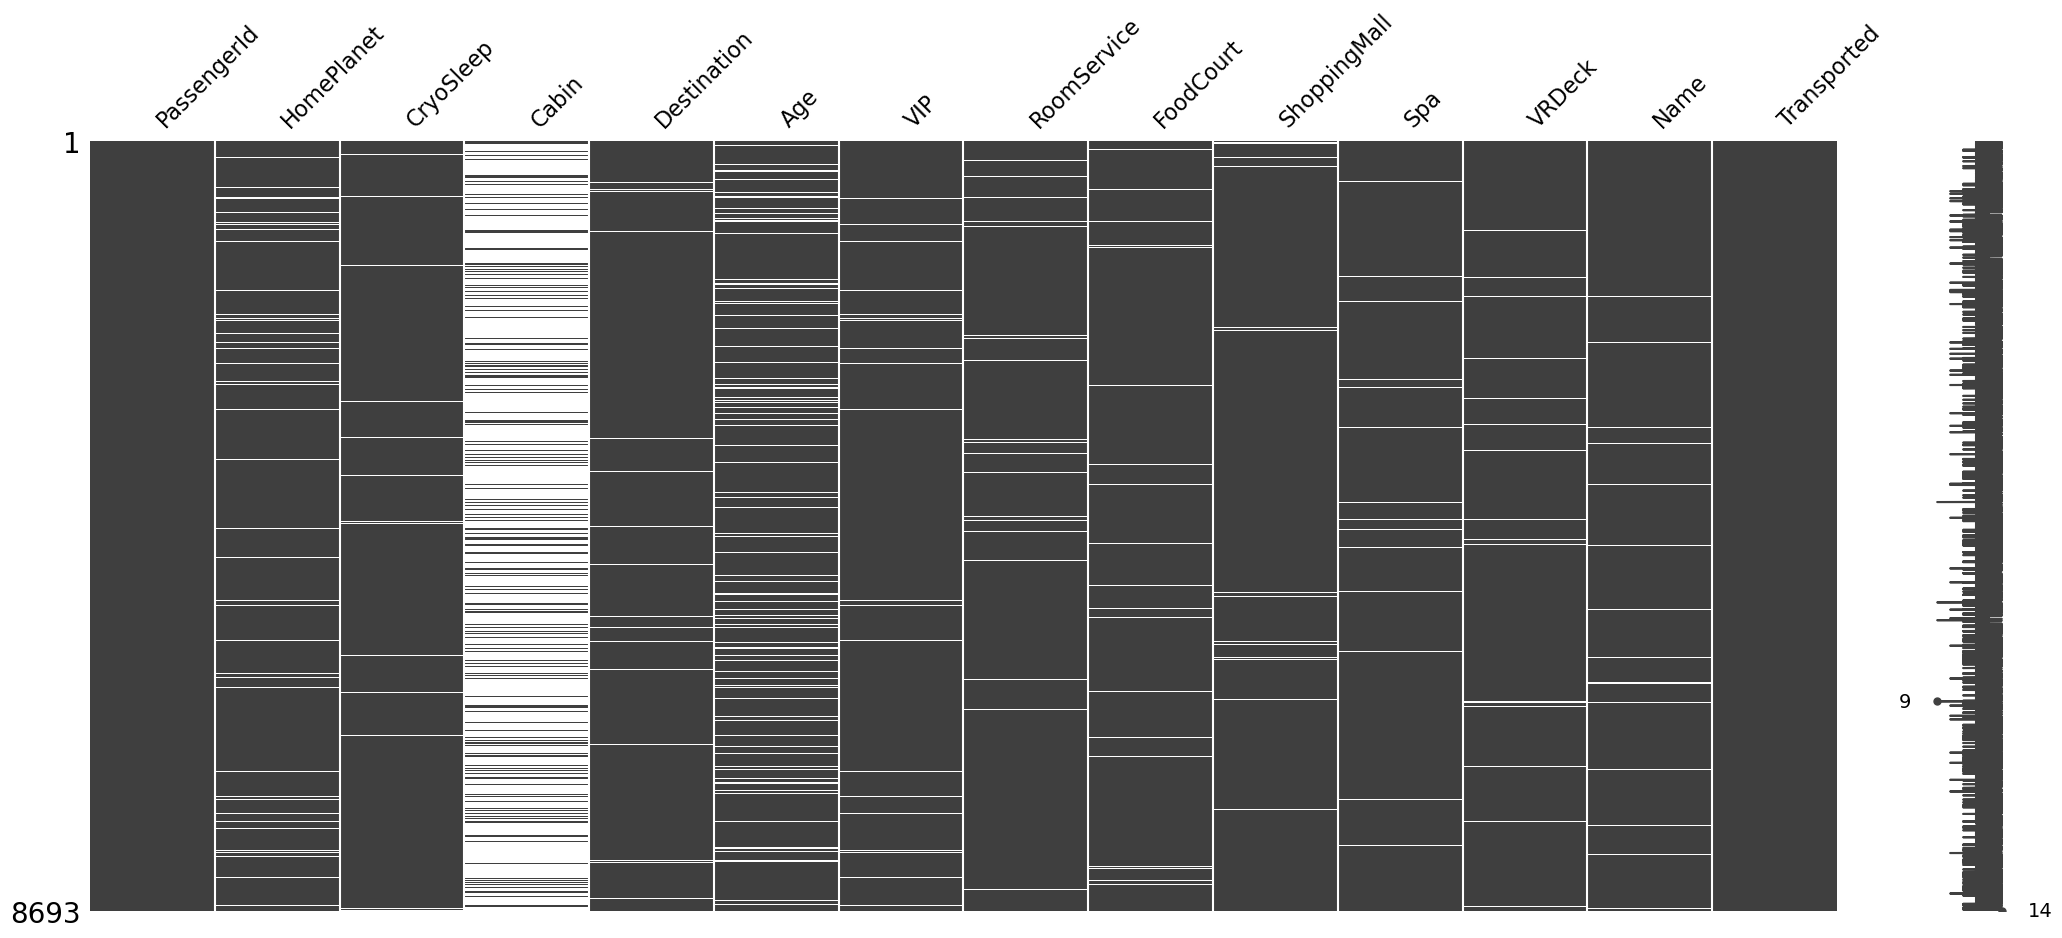

In [275]:
# we want to see if the missingness is random or not random
# is there a pattern? example: after a given age there are all missing values
msno.matrix(data)
plt.show()

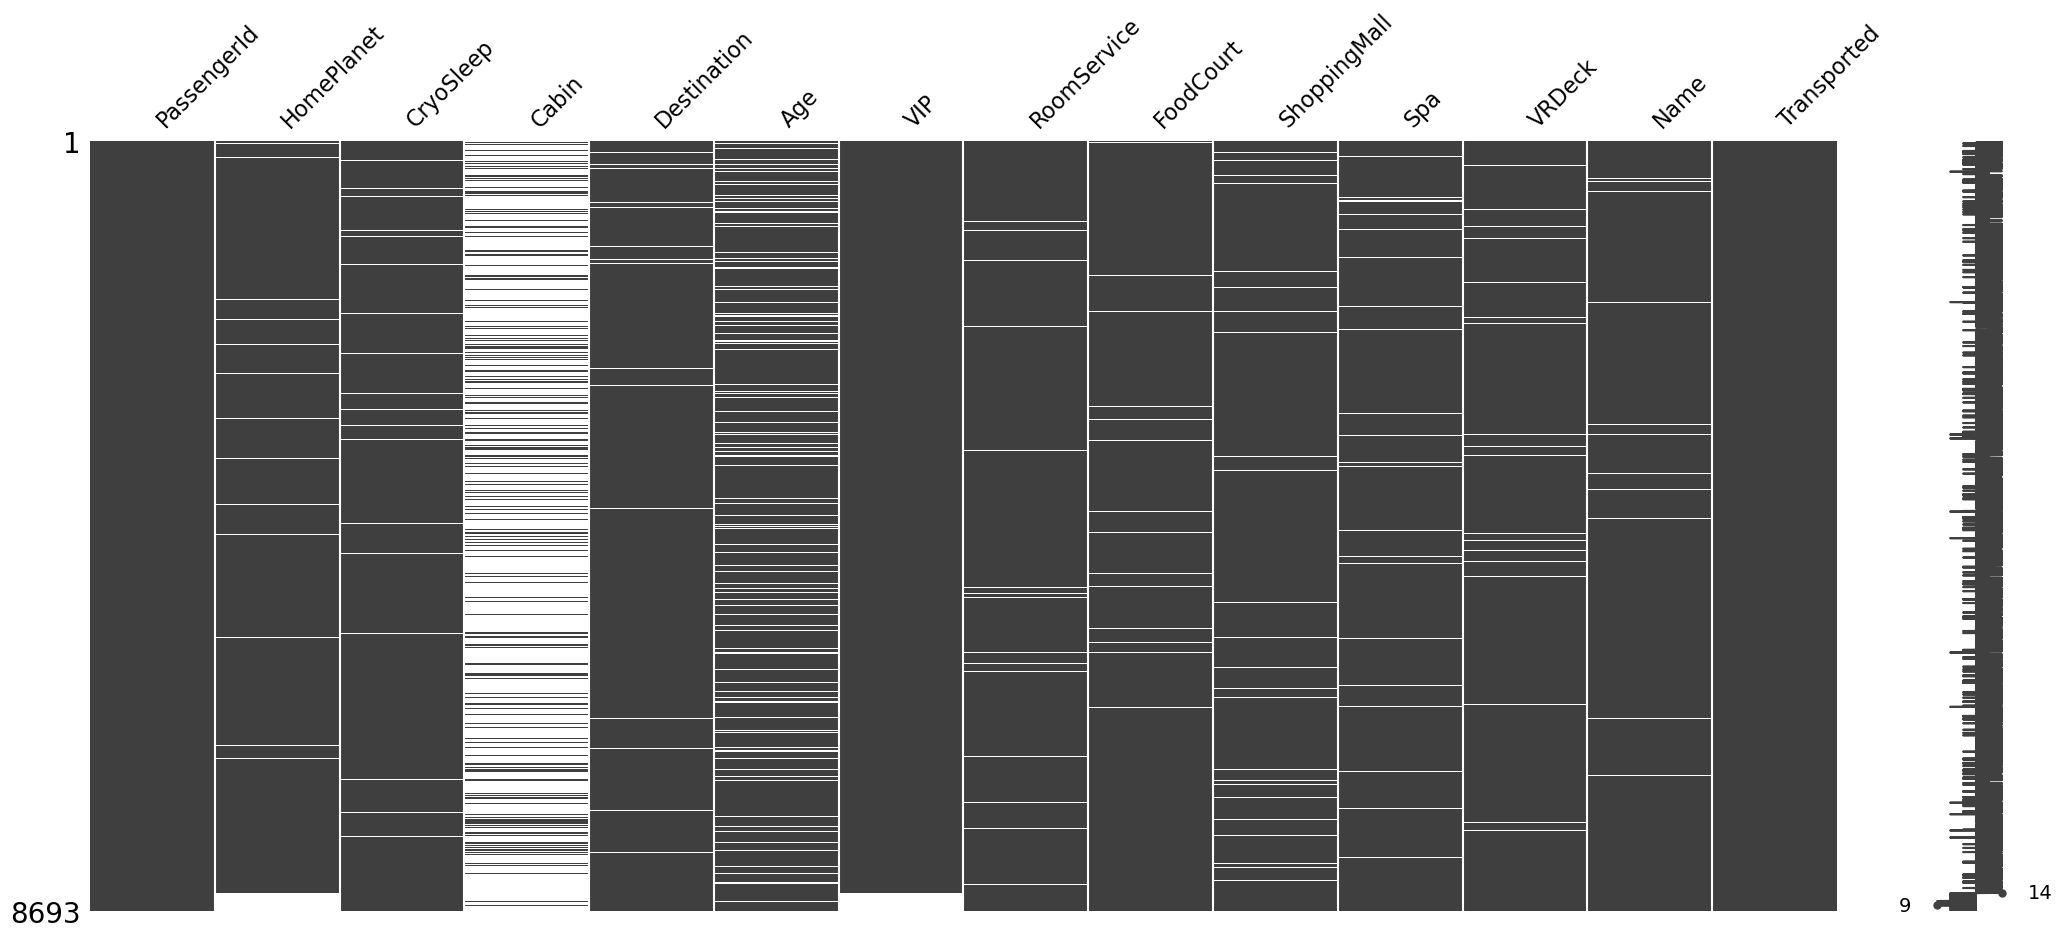

In [276]:
msno.matrix(data.sort_values('VIP')) # sort by VIP
plt.show()
# the graph below shows that when VIP is missing then HomePLanet is also missing
# When HomePlanet is missing then VIP is also missing
# When VIP is missing, HomePlanet misses in other places also

# the best way to check the correlation of the missing values is using a heatmap

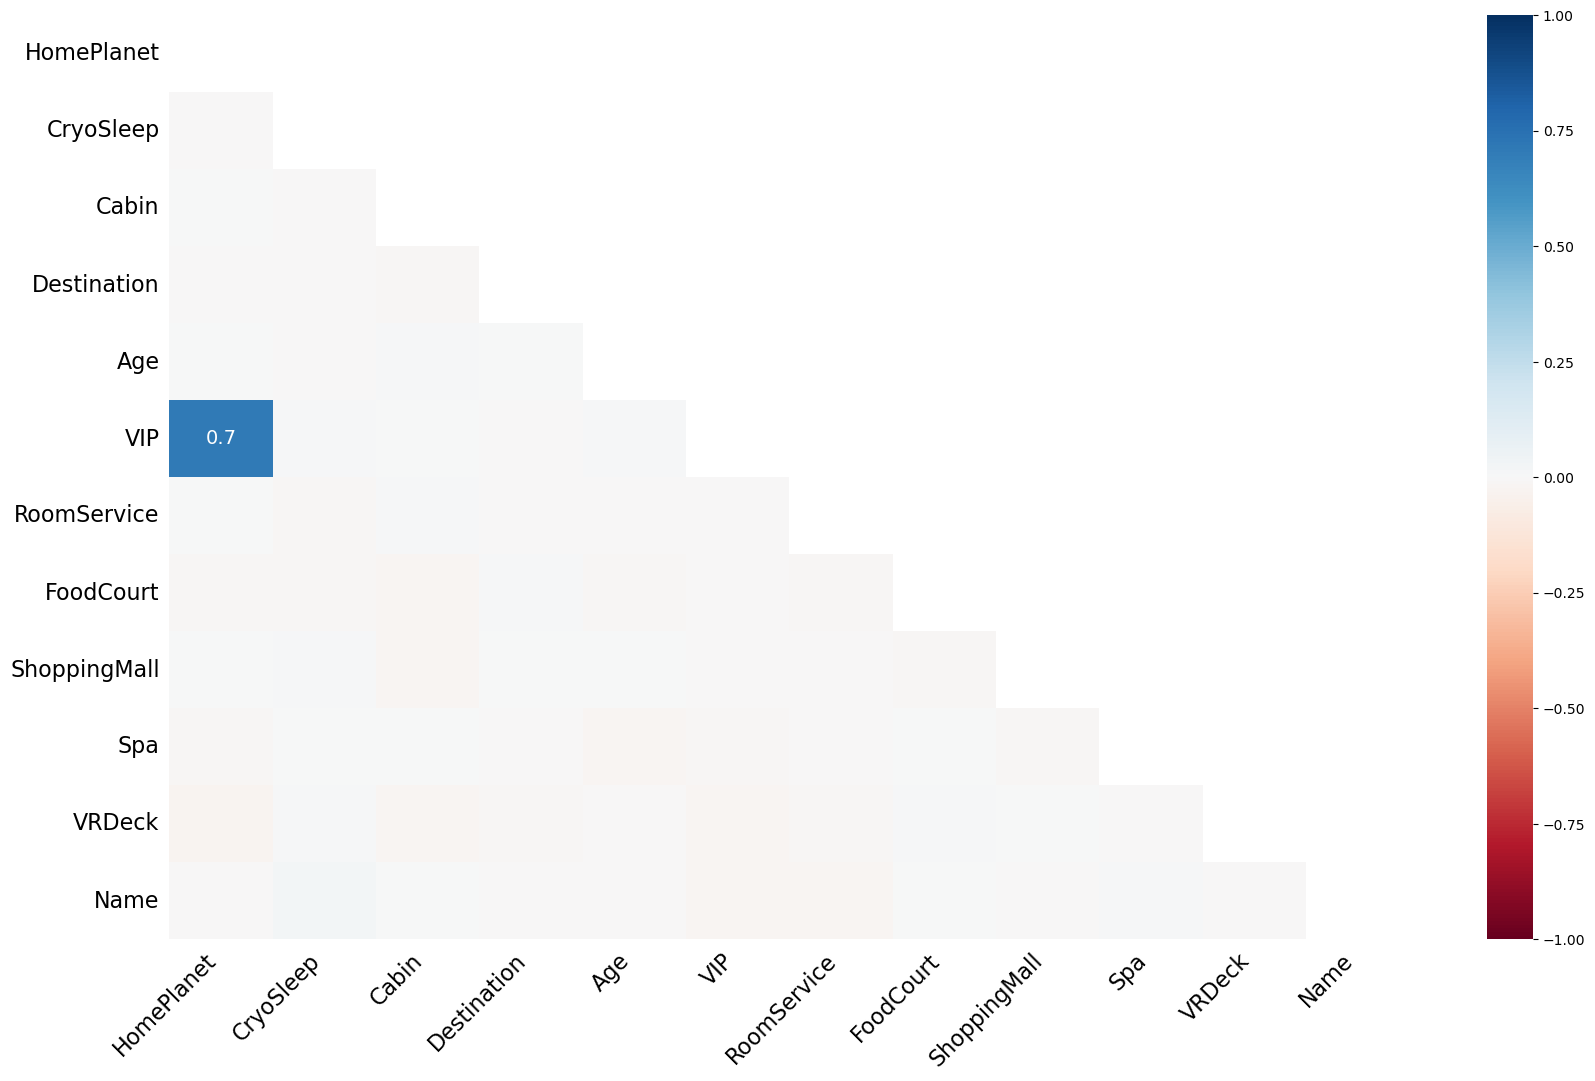

In [277]:
msno.heatmap(data)
plt.show()

What does the 0.7 correlation tell us? Is the data missing at random?

The correlation value of 0.7 between two features (likely VIP and HomePlanet) indicates a moderate to strong positive correlation. This means:

When one variable increases (e.g., Age), the other (e.g., VIP status) tends to increase as well, though not perfectly.
For example, older individuals might be more likely to be labeled as VIP in your dataset.
- It is MAR
- There is high correlation between the two.
- In order to further check the correlation we will use a dendogram:

checks the correlation only between the missing values
TransportedId and PassangerId dont have missing values

VIP and HomePlanet do have a strong correlation

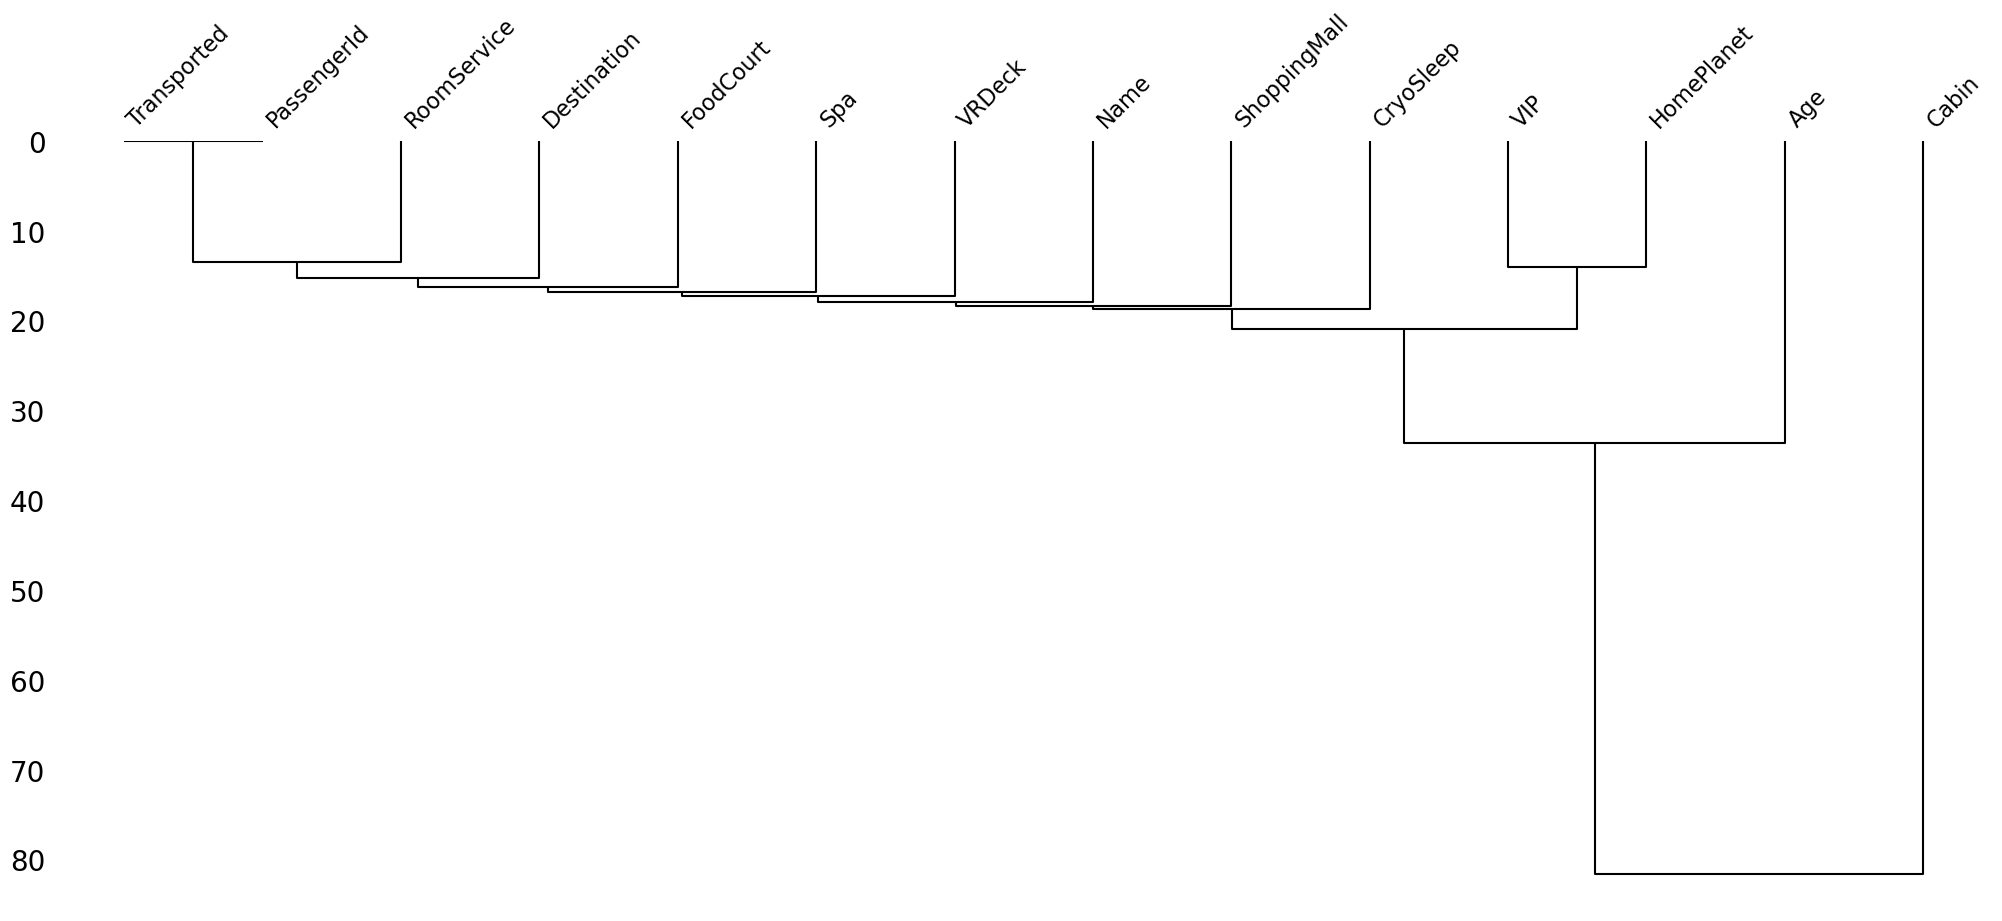

In [281]:
msno.dendrogram(data)
plt.show()


## 2. Handling Missing Values

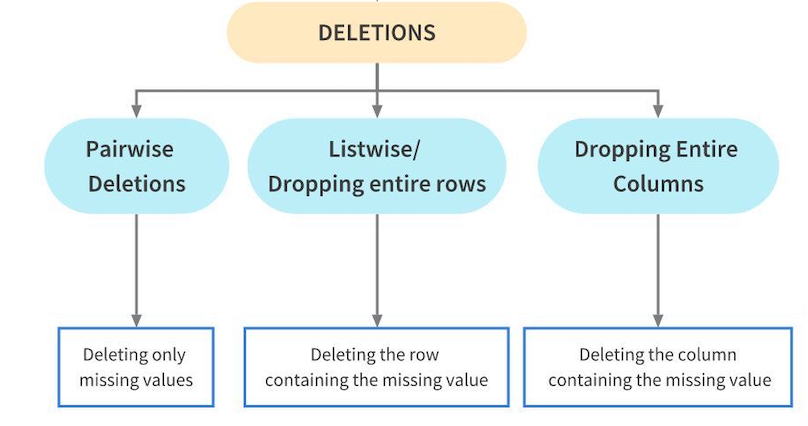

**Parwise Deletion** is used when values are missing completely at random i.e **MCAR**. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [285]:
data.Age.mean()
# data['Age'] = data['Age'].fillna(data['Age'].mean())

28.798805039615534

**Listwise deletion**, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, **listwise deletions are also only used for MCAR values**.

In [287]:
data = data.dropna(subset=['RoomService'], axis=0)
# This specifies that only the RoomService column should be checked for missing values.
# This operation results in a new DataFrame (data) without rows where the RoomService column has missing data.
# Deletes only the rows where RoomService is none

In [288]:
data.isnull().sum()

PassengerId        0
HomePlanet       391
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt        181
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

The Listwise deletion problem is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

**Dropping complete columns**
If a column contains a lot of missing values, say more than 70%, and the feature is not significant for the task at hand, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [291]:
data = data.drop(columns='Cabin')

*Note: Even though we don't see it at first, the cabin feature has actually significant correlation with the target variable 'Transported'.*

### Data Imputation

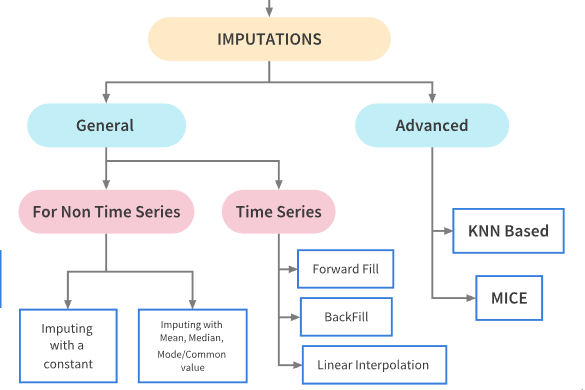

#### Imputing with a constant, mean, meadian, etc.

In [296]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,NaN,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [297]:
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
# fill with 0

In [298]:
data['FoodCourt'] = constant_imputer.fit_transform([data['FoodCourt']])[0]  # we hypothesize that the missing values actually represent that people haven't spent any money on food
# find the FoodCourt none values and replace them woth the constant

In [299]:
data.isnull().sum()

PassengerId       0
HomePlanet      391
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [300]:
frequent_imputer = SimpleImputer(strategy = 'most_frequent')

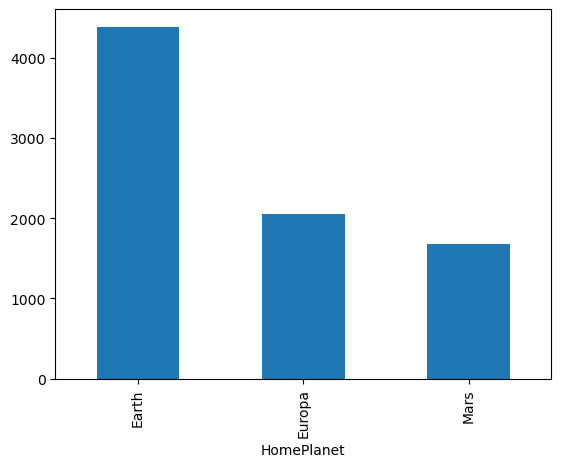

In [301]:
data['HomePlanet'].value_counts().plot.bar()
plt.show()

In [302]:
data['HomePlanet'] = data['HomePlanet'].astype(str)  # Simple imputer with most_frequent works with numbers (integers) and strings

In [303]:
data['HomePlanet'] = frequent_imputer.fit_transform(data['HomePlanet'].values.reshape(1, -1))[0]  # should fill missing values with 'Earth' since it's the most frequent

In [304]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

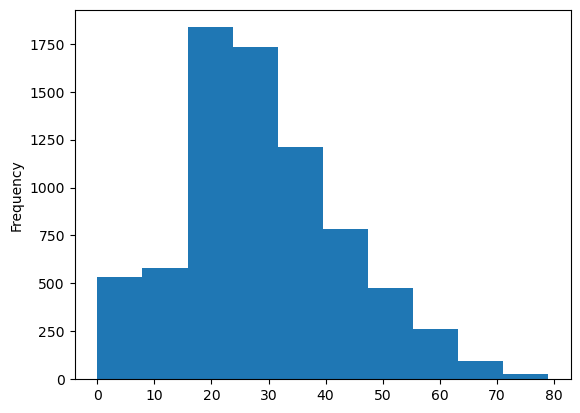

In [305]:
data.Age.plot.hist()
plt.show()

In [306]:
data.Age = data.Age.fillna(data.Age.mean())

In [307]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

<Axes: ylabel='Frequency'>

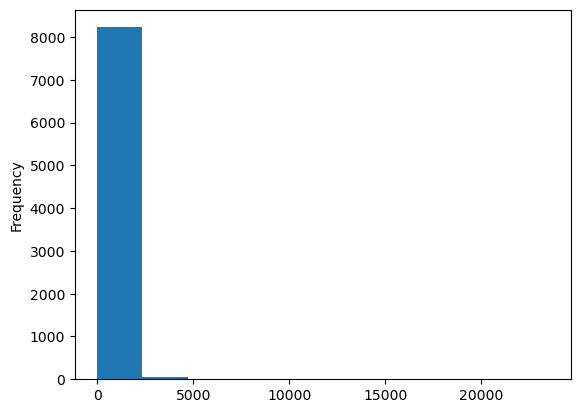

In [308]:
data.ShoppingMall.plot.hist()

In [309]:
data.ShoppingMall.mean()

173.41911410688493

In [310]:
data.ShoppingMall.median()

0.0

In [311]:
data.ShoppingMall = data.ShoppingMall.fillna(data.ShoppingMall.median())

## Advanced Imputation Techniques

### K-Nearest Neighbor Imputation

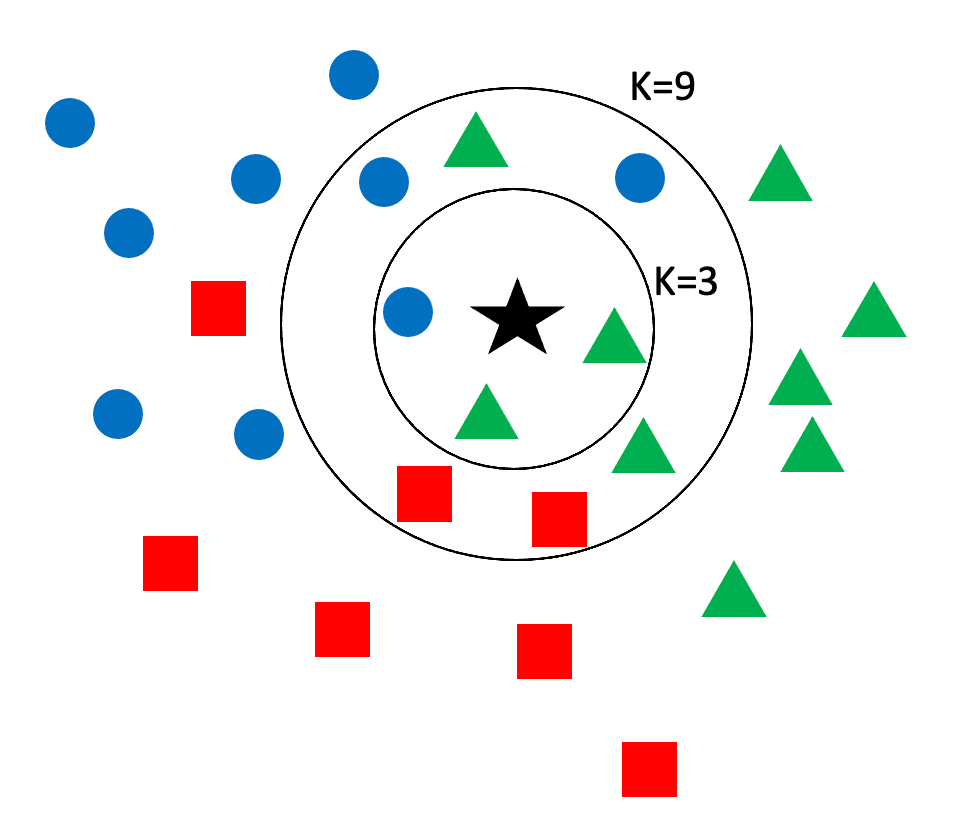

In [315]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

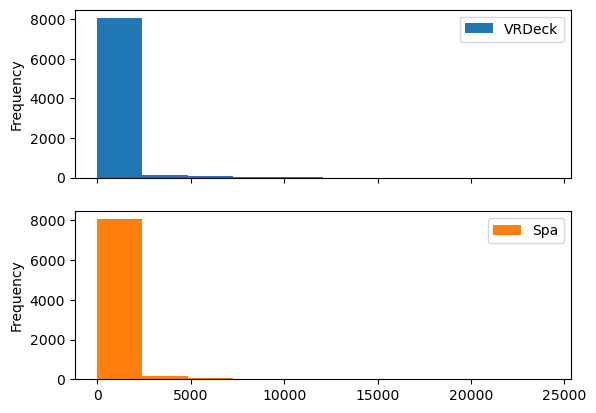

In [316]:
data[['VRDeck', 'Spa']].plot.hist(subplots=True)
plt.show()

Normalize using min-max scaler:

In [318]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['VRDeck', 'Spa']])

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

1. Min-Max Scaling
Purpose: Min-max scaling transforms the data into a range between 0 and 1.
This is essential for KNN imputation because KNN algorithms work better with normalized or scaled data (to avoid one feature dominating due to differing ranges).


In [320]:
imputed_data

array([[0.00000000e+00, 0.00000000e+00],
       [1.82322960e-03, 2.45001785e-02],
       [2.03041478e-03, 2.99669761e-01],
       ...,
       [0.00000000e+00, 4.46269190e-05],
       [1.34048813e-01, 1.57533024e-02],
       [4.97244437e-04, 0.00000000e+00]])

Returns the data to its original range for interpretability:

In [322]:
imputed_data = scaler.inverse_transform(imputed_data)

In [323]:
imputed_data

array([[0.000e+00, 0.000e+00],
       [4.400e+01, 5.490e+02],
       [4.900e+01, 6.715e+03],
       ...,
       [0.000e+00, 1.000e+00],
       [3.235e+03, 3.530e+02],
       [1.200e+01, 0.000e+00]])

In [324]:
data[['VRDeck', 'Spa']] = imputed_data

In [325]:
data.isnull().sum() 

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

### Multivariate feature imputation - Multivariate imputation by chained equations (MICE)

 A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:

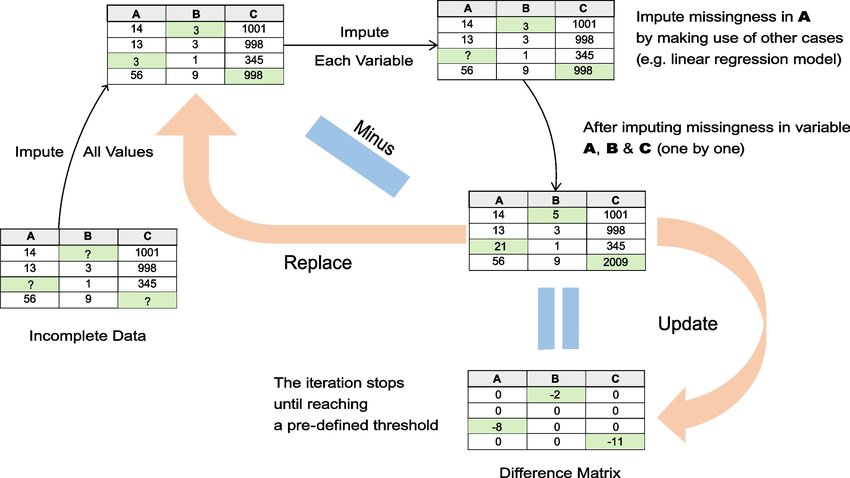

In [328]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

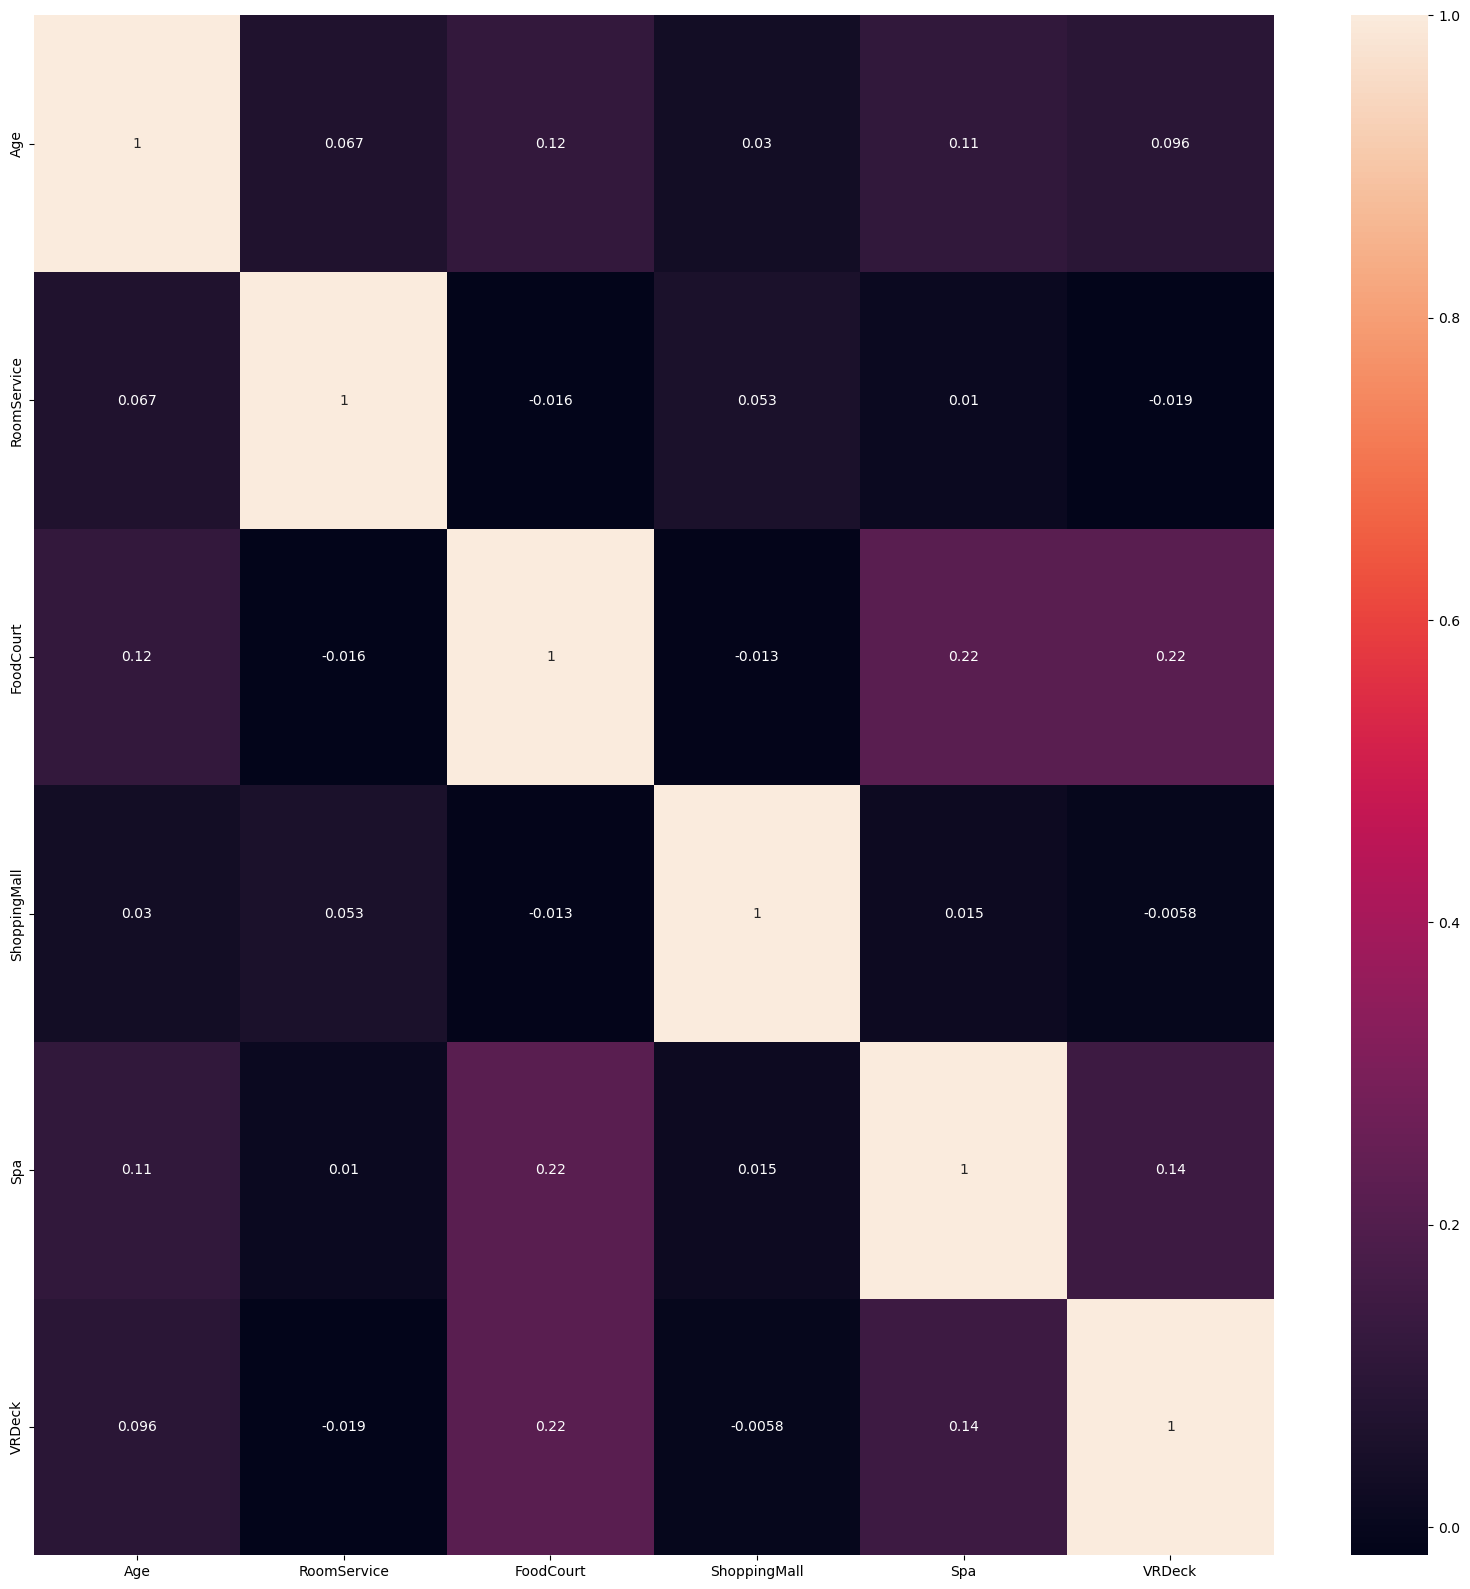

In [329]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr(), annot=True)
plt.show()

Imagine the values are still missing

In [331]:
mice = IterativeImputer()
imputed_values = mice.fit_transform(data[['VRDeck', 'FoodCourt', 'Spa']])
data[['VRDeck', 'FoodCourt', 'Spa']] = imputed_values

# 3. Time - Series Missing Value Imputation

You can use MICE and KNN for time series as well since they will use the dependencies between variables.

In [334]:
aq_data = pd.read_csv('air_quality_missing.csv')

In [335]:
aq_data.head(50)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.2,NaN,61.0
5,1/1/2017 5:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.1,NaN,61.0
6,1/1/2017 6:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,NaN,57.0
7,1/1/2017 7:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,NaN,60.0
8,1/1/2017 8:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,NaN,60.0
9,1/1/2017 9:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,NaN,63.0


For NO2 we have missing values at the start

In [337]:
aq_data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [338]:
aq_data.tail(20)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647491,12/31/2019 4:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.010,0.023,0.4,42.0,34.0
647492,12/31/2019 5:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.011,0.023,0.4,31.0,24.0
647493,12/31/2019 6:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.021,0.4,28.0,22.0
647494,12/31/2019 7:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.018,0.019,0.4,25.0,19.0
647495,12/31/2019 8:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.019,0.4,25.0,17.0
647496,12/31/2019 9:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.020,0.4,20.0,13.0
647497,12/31/2019 10:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.014,0.023,0.4,20.0,11.0
647498,12/31/2019 11:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.014,0.023,0.4,18.0,13.0
647499,12/31/2019 12:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,19.0,14.0
647500,12/31/2019 13:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,22.0,15.0


For CO we have missing values at the end

In [340]:
aq_data['NO2'] = aq_data['NO2'].bfill()

In [341]:
aq_data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.2,NaN,61.0


In [342]:
aq_data['CO'] = aq_data['CO'].ffill()

In [343]:
aq_data.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                95
PM2.5               78
dtype: int64

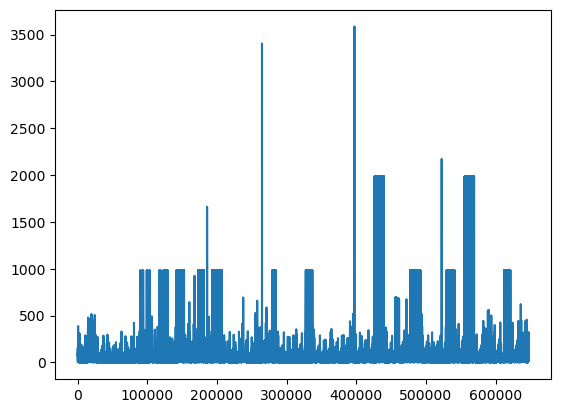

In [344]:
aq_data['PM10'].plot.line()
plt.show()

In [345]:
aq_data['PM10'] = aq_data['PM10'].interpolate(limit_direction='both')

In [346]:
aq_data.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                 0
PM2.5               78
dtype: int64

# Label Encoding

In [348]:
data.HomePlanet

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8512, dtype: object

In [349]:
data.HomePlanet.value_counts()

HomePlanet
Earth     4387
Europa    2053
Mars      1681
nan        391
Name: count, dtype: int64

In [350]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['HomePlanet'])

In [351]:
data['HomePlanet_Enc'] = encoded_values

In [433]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Enc,CryoSleep_Enc,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0.0,False,False,True
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0.0,False,False,True
2,0003_01,Europa,False,TRAPPIST-1e,28.839082,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0.0,False,False,True
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0.0,False,False,True
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0.0,True,False,False
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,1.0,False,True,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0.0,False,False,True
8691,9280_01,Europa,False,55 Cancri e,28.839082,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0.0,True,False,False


Custom Encoding

In [354]:
def encode_bool_variable(x):
  if type(x) == float:
    return x
  return 1 if x else 0

In [355]:
data['CryoSleep_Enc'] = data.CryoSleep.apply(encode_bool_variable)

One-Hot Encoding

In [357]:
data.Destination.value_counts()

Destination
TRAPPIST-1e      5787
55 Cancri e      1771
PSO J318.5-22     775
Name: count, dtype: int64

In [358]:
one_hot_destination = pd.get_dummies(data.Destination)

In [359]:
data = pd.concat([data, one_hot_destination], axis=1)